
<img src="https://upload.wikimedia.org/wikipedia/commons/0/02/Stack_Overflow_logo.svg"></img>

<h1><center><font size="6">Stack Overflow 2018 Developer Survey Extensive EDA</font></center></h1>



# <a id='0'>Content</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Load packages</a>  
- <a href='#3'>Read the data</a>  
- <a href='#4'>Check the data</a>  
    - <a href='#41'>Glimpse the data</a>  
    - <a href='#42'>Check missing data</a>
- <a href='#5'>Data exploration</a>
    - <a href='#50'>Country</a>
    - <a href='#51'>Education</a>
    - <a href='#52'>Employment and Career</a>
    - <a href='#53'>Salary</a>    
    - <a href='#54'>Programming skills and preferences</a>
    - <a href='#55'>Advertising</a>
    - <a href='#56'>Ethics</a>
    - <a href='#57'>Artificial Intelligence</a>
    - <a href='#58'>Personal information</a>
- <a href='#6'>Advanced data analysis</a>   
    - <a href='#61'>Salary per employment type and gender</a>
    - <a href='#62'>Salary per employment type and years coding</a>
    - <a href='#63'>Operating System and gender</a>
    - <a href='#64'>Exercise and Operating System</a>
    - <a href='#65'>Dangers of AI and age</a>
    - <a href='#66'>Dangers of AI and Operating System</a> 
    - <a href='#67'>Most interesting aspects of AI and age</a>
    - <a href='#68'>Most interesting aspects of AI and Operating System</a>   
    - <a href='#69'>Responsibility for AI and age</a>
    - <a href='#610'>Responsibility for AI and Operating System</a> 
- <a href='#7'>Feedback</a>
- <a href='#8'>References</a>


# <a id="1">Introduction</a>  

Each year, Stack Overflow ask the developer community about everything from their favorite technologies to their job preferences. This year marks the eighth year that Stack Overflow published the Annual Developer Survey results—with the largest number of respondents yet. Over 100,000 developers took the 30-minute survey in January 2018.

This year, they covered a few new topics ranging from artificial intelligence to ethics in coding. They also found that underrepresented groups in tech responded to our survey at even lower rates than we would expect from their participation in the workforce. 

There are **98,855** responses in this public data release. These responses are what Stack Overflow considered *qualified* for analytical purposes based on completion and time spent on the survey and included at least one non-PII question. Of the qualified responses, **67,441** completed the entire survey.

<a href="#0"><font size="1">Go to top</font></a>

# <a id="2">Load packages</a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

# Print all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
IS_LOCAL = True

import os

if(IS_LOCAL):
    PATH="../input/stack-overflow-2018-developer-survey"
else:
    PATH="../input"
print(os.listdir(PATH))

['survey_results_public.csv', 'survey_results_schema.csv']


# <a id="3">Read the data</a>

In [2]:
data_df = pd.read_csv(PATH+"/survey_results_public.csv")
schema_df = pd.read_csv(PATH+"/survey_results_schema.csv")

<a href="#0"><font size="1">Go to top</font></a>

# <a id="4">Check the data</a>

In [3]:
print("Stack Overflow 2018 Developer Survey data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Stack Overflow 2018 Developer Survey data -  rows: 98855  columns: 129


There are **98,885** data rows and **129** columns.

In [4]:
print("Stack Overflow 2018 Developer Survey schema -  rows:",schema_df.shape[0]," columns:", schema_df.shape[1])

Stack Overflow 2018 Developer Survey schema -  rows: 129  columns: 2


The schema dataset contains **129** rows - each row will explain one column from the main dataset. 


<a href="#0"><font size="1">Go to top</font></a>

## <a id="41">Glimpse the data</a>

We start by looking to the data features (first 5 rows).

In [5]:
data_df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

## <a id="42">Check missing data</a>  

Let's check if there is any missing data.

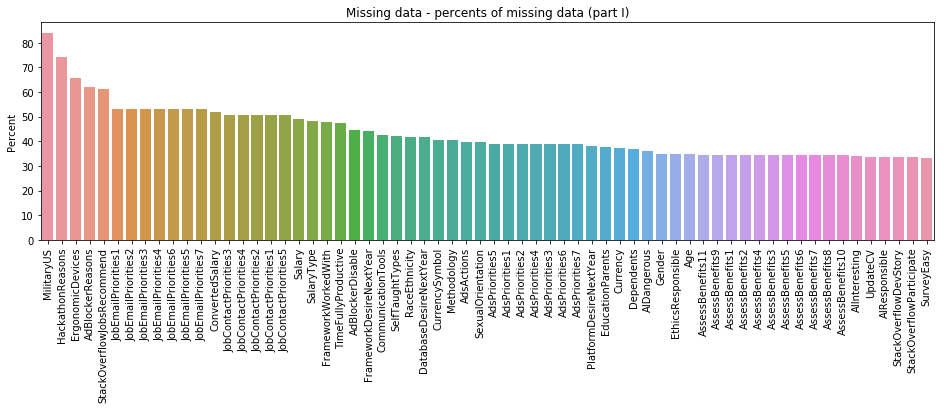

In [6]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
tmp = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

def plot_missing_data(start, end, text):
    tmp1 = tmp[start:end]
    plt.figure(figsize = (16,4))
    plt.title('Missing data - percents of missing data (part %s)' % text)
    s = sns.barplot(x=tmp1.index,y=tmp1['Percent'])
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()    
    

plot_missing_data(1,65,"I")

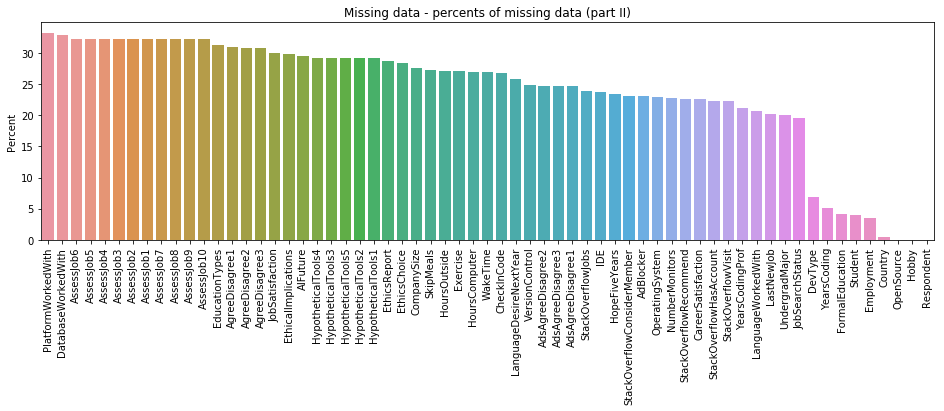

In [7]:
plot_missing_data(66,129,"II")

Most of the respondents answered to questions: **DevType**, **YearsCoding**, **FormalEducation**, **Student**, **Employment** and **Country**. All respondents answered the questions **OpenSource** and **Hobby**.

More than 80% of the respondents did not filled the **MilitaryUS**; 75% of responses miss **HakatonReason**.

One can observe that group questions have very close percent of answers; **JobEmailPriorities1-7** have all around 50% missing, **AdsPriorities1-5** around 40% missing, **AssessJob1-10** have around 30% missing.


Only ~50% of respondents gave their salary, ~60% specified their gender.


<a href="#0"><font size="1">Go to top</font></a>


# <a id="5">Data exploration</a>

## <a id="50">Country</a>


Let's represent the top 50 respondents countries.

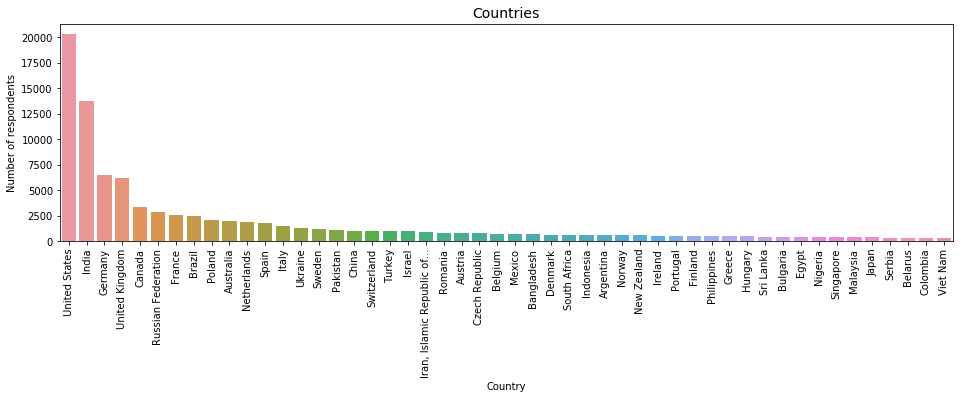

In [8]:
def plot_stats(feature, text, size=2):
    temp = data_df[feature].dropna().value_counts().head(50)
    df1 = pd.DataFrame({feature: temp.index,'Number of respondents': temp.values})
    plt.figure(figsize = (8*size,4))
    plt.title(text,fontsize=14)
    s = sns.barplot(x=feature,y='Number of respondents',data=df1)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()   
    
plot_stats('Country','Countries')

Most respondents are from **United States** (20K), followed by **India** (13.7K), **Germany** (6.4K) and **United Kingdom** (6K).

<a href="#0"><font size="1">Go to top</font></a>

## <a id="51">Education</a>

Let's see what kind of education have the respondents.

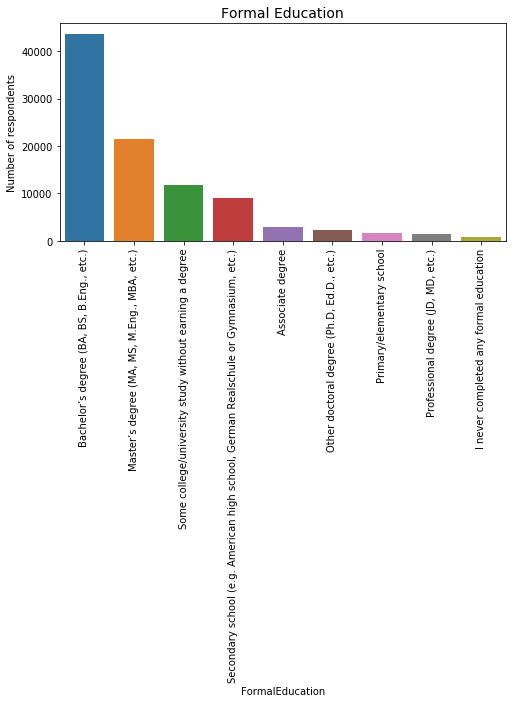

In [9]:
plot_stats('FormalEducation','Formal Education',1)

Over 40K respondents completed Bachelor's degree, ~20K completed Master's degree, over 10K completed some form of college education. Only few thousands have some sort of doctoral studies.

Let's see what was the respondents major.

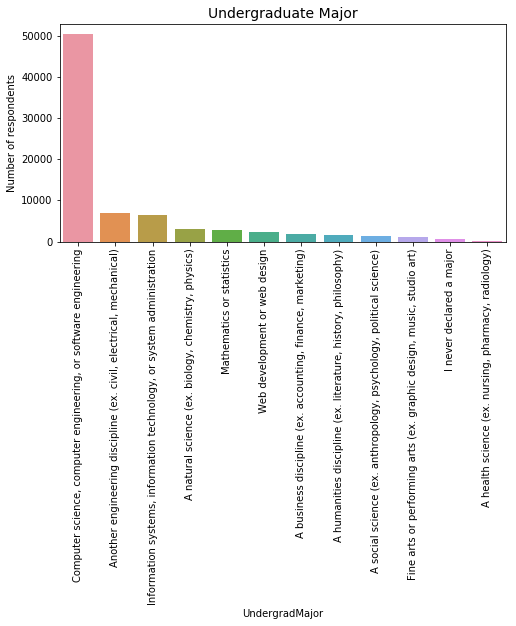

In [10]:
plot_stats('UndergradMajor','Undergraduate Major',1)

The large majority of respondents (more than 50K) graduated with a Major in **Computer science, computer engineering, or software engineering**. Next two categories, with less than 10K, are **Another engineering discipline** and **Information systems, information technology, or system administration**.

Let's see also if the respondents are currently students.

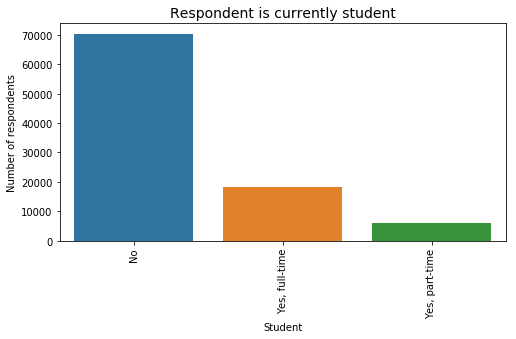

In [11]:
plot_stats('Student','Respondent is currently student',1)

Currently, ~70K respondents are not students, less than 20K are currently full-time students and less than 10K are currently part-time students.

Let's also see what was the education of respondents parents.

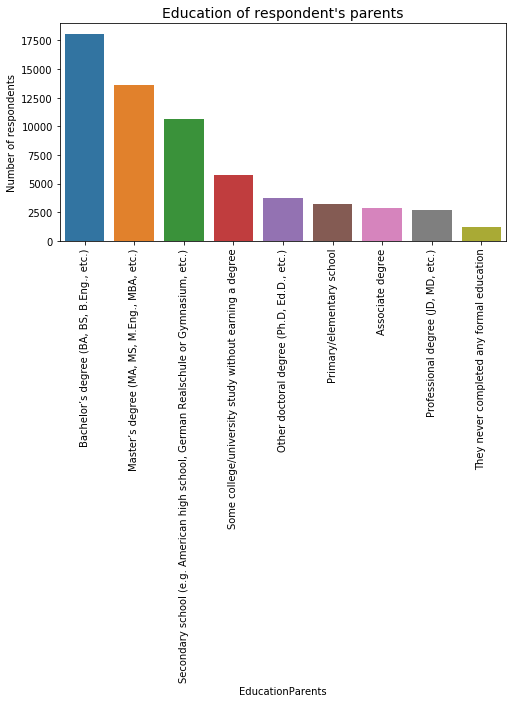

In [12]:
plot_stats('EducationParents','Education of respondent\'s parents',1)

As for the education of their parents, the respondents specified in 17.5K cases that their parents had Bachelor's degree, Master's degree in ~13K cases, Secondary school in ~10K cases. Less than 5K respondents have parents with Doctoral degrees. Around 1K respondents specified that their parents never completed any formal education. 


<a href="#0"><font size="1">Go to top</font></a>

## <a id="52">Employment and Career</a>

Let's start by assesing what type of employment the respondents have.

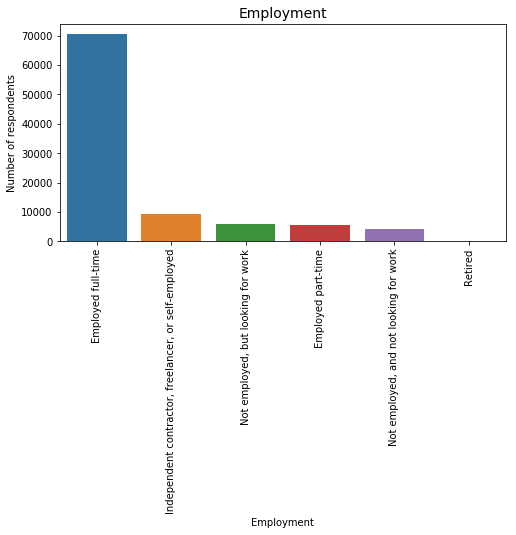

In [13]:
plot_stats('Employment','Employment',1)

Over 70K respondents confirmed that they are **Employed full-time**. Less than 10K filled in that they are **Independent contractor, freelancer, or self-employed**. Just few thousands are either **Not employed, but looking for work**, **Employed part-time** or **Not employed and not looking for work**. A very small number are retired.

Let'se verify the company size for the employed respondents.

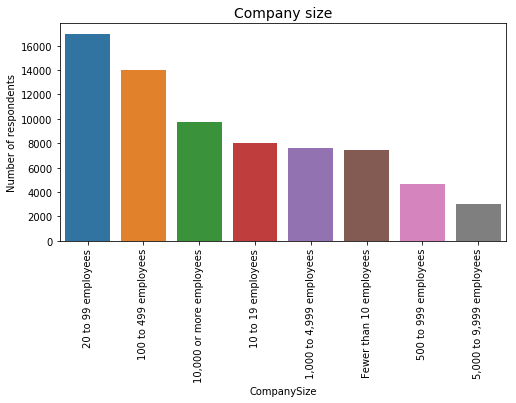

In [14]:
plot_stats('CompanySize','Company size',1)

The majority of respondents (~16K) are from small companies (20-99 employees), ~14K from companies with 100-499 employees, less than 10K from large companies (10,000 or more employees), ~8K from companies with fewer than 10 employees, with 10-19 employees or with 1k-5K employees.

Let's check the job satisfaction of the respondents.

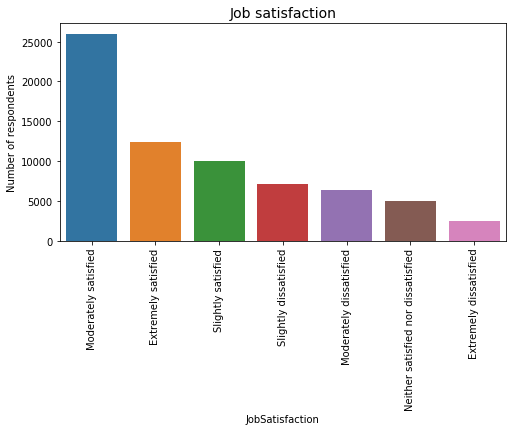

In [15]:
plot_stats('JobSatisfaction','Job satisfaction',1)

Most of the respondents (25K) declared that they are Moderately satisfied with their job. Around 12K declared that they are extremely satisfied with their job. Around 3K declared that they are Extremely dissatisfied with their jobs.


Let's check now the levels of career satisfaction of the same respondents.

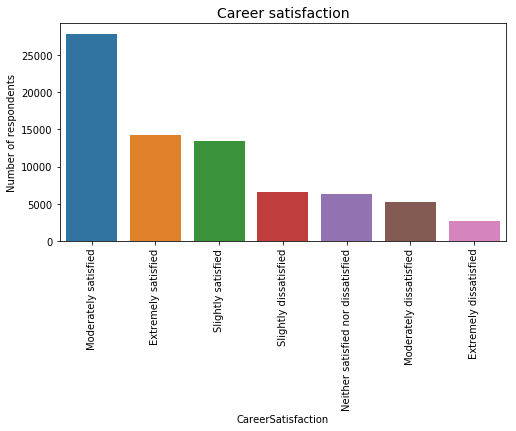

In [16]:
plot_stats('CareerSatisfaction','Career satisfaction',1)

Most of the respondents (more than 25K) declared that they are Moderately satisfied with their career. Less than 15K declared that they are extremely satisfied with their career. Around 3K declared that they are Extremely dissatisfied with their career.


Let's check now where the respondents see themselves in 5 years.

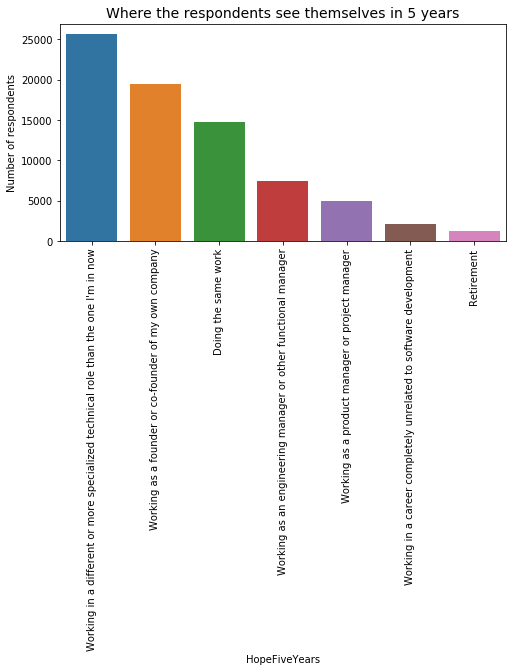

In [17]:
plot_stats('HopeFiveYears','Where the respondents see themselves in 5 years',1)

Most of the answering respondents (~25K) see themselves in 5 years **Working in a different or more specialized technical role than one I'm now**, almost 20K **Working as a founder of my own company**, ~15K **Doing the same job**. Around 1K see themselves in 5 years doing ... **Retirement**.


Let's check also what is their status with searching a new job.

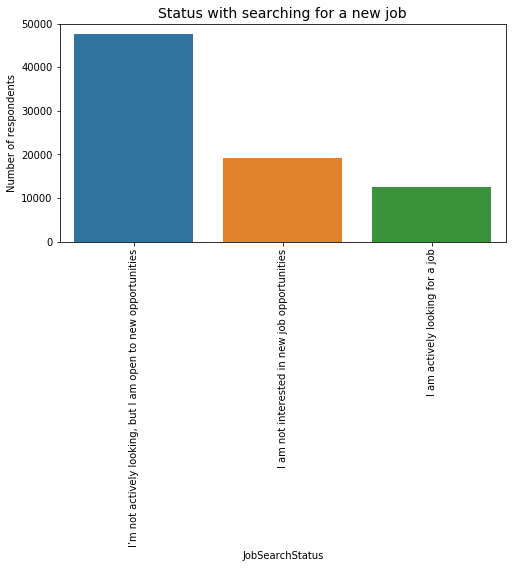

In [18]:
plot_stats('JobSearchStatus','Status with searching for a new job',1)

Allmost 50K from the respondents listed their status as **I'm not actively looking, but I am open to new opportunities** (majority). Around 20K selected **I am not interested in new job opportunities** and ~15K selected **I am actively looking for a job**.


Let's verify how long the respondents were with the last job.

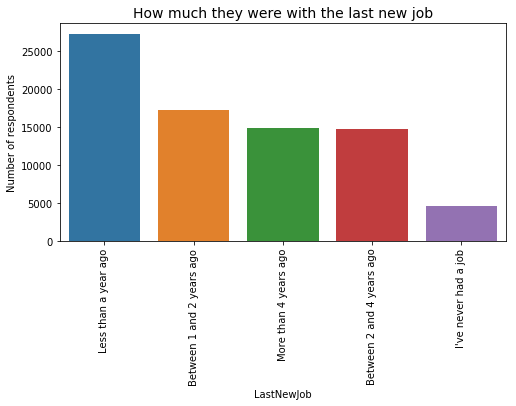

In [19]:
plot_stats('LastNewJob','How much they were with the last new job',1)

The answers for this question show the dynamic of the industry. Over 25K were less than one year in the current job, ~17K were between 1 and 2 years, 15K were either more that 4 years or between 2 and 4 years. Around 5K selected the option `I've never had a job`.

### Job assesment

Let's see now the answers given for the Job Assessment group of questions. The respondents are asked to give the importance of certain criteria in the assessment of a potential job (select importances from 1 to 10 for each of the 10 criteria). 

In [20]:
schema_df[schema_df['Column'].str.contains('AssessJob')]

,Column,QuestionText
17,AssessJob1,Imagine that you are assessing a potential job...
18,AssessJob2,Imagine that you are assessing a potential job...
19,AssessJob3,Imagine that you are assessing a potential job...
20,AssessJob4,Imagine that you are assessing a potential job...
21,AssessJob5,Imagine that you are assessing a potential job...
22,AssessJob6,Imagine that you are assessing a potential job...
23,AssessJob7,Imagine that you are assessing a potential job...
24,AssessJob8,Imagine that you are assessing a potential job...
25,AssessJob9,Imagine that you are assessing a potential job...
26,AssessJob10,Imagine that you are assessing a potential job...


We will define a general plot heatmap function which will receive a keyword, extract from the schema all the entries containing that keyword in the **Column** feature entries, count the number of occurences, parse all, build the statistics for all occurences and then plot as a histogram. This will be reused for all clusters of questions requested to select a priority for each criteria in the cluster.

In [21]:
def plot_heatmap(feature, text, color="Blues"):
    tmp = schema_df[schema_df['Column'].str.contains(feature)]
    features = list(tmp['Column'])
    dim = len(features)
    temp1 = pd.DataFrame(np.random.randint(low=0, high=10,size=(1+dim, dim)),columns=features)
    for feature in features:
        temp1[feature] = data_df[feature].dropna().value_counts()

    fig, (ax1) = plt.subplots(ncols=1, figsize=(16,4))
    sns.heatmap(temp1[1::], 
        xticklabels=temp1.columns,
        yticklabels=temp1.index[1::],annot=True,ax=ax1,linewidths=.1,cmap=color)
    plt.title(text, fontsize=14)
    plt.show()

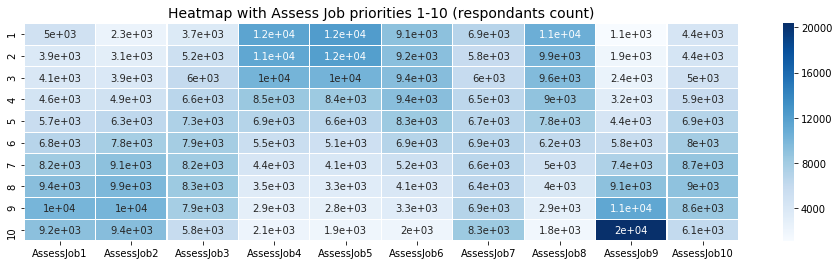

In [22]:
plot_heatmap('AssessJob','Heatmap with Assess Job priorities 1-10 (respondants count)')

The results are showing the preferences for the entire respondents population. For the 1st criteria most of the respondents gave priority 9, for the 2nd priority 9, for the 3rd priority 8 ets. The largest number of respondents selected for the 9th criteria the 10 priority. Priority 1 results for criteria 4, 5, and 8.


### Job benefits assesment


Let's see now the answers given for the Job benefits assessment group of questions. The respondents are asked to give the importance of certain criteria in the assessment of a potential benefits (select importances from 1 to 11 for each of the 11 criteria).

In [23]:
schema_df[schema_df['Column'].str.contains('AssessBenefits')]

,Column,QuestionText
27,AssessBenefits1,"Now, imagine you are assessing a job's benefit..."
28,AssessBenefits2,"Now, imagine you are assessing a job's benefit..."
29,AssessBenefits3,"Now, imagine you are assessing a job's benefit..."
30,AssessBenefits4,"Now, imagine you are assessing a job's benefit..."
31,AssessBenefits5,"Now, imagine you are assessing a job's benefit..."
32,AssessBenefits6,"Now, imagine you are assessing a job's benefit..."
33,AssessBenefits7,"Now, imagine you are assessing a job's benefit..."
34,AssessBenefits8,"Now, imagine you are assessing a job's benefit..."
35,AssessBenefits9,"Now, imagine you are assessing a job's benefit..."
36,AssessBenefits10,"Now, imagine you are assessing a job's benefit..."


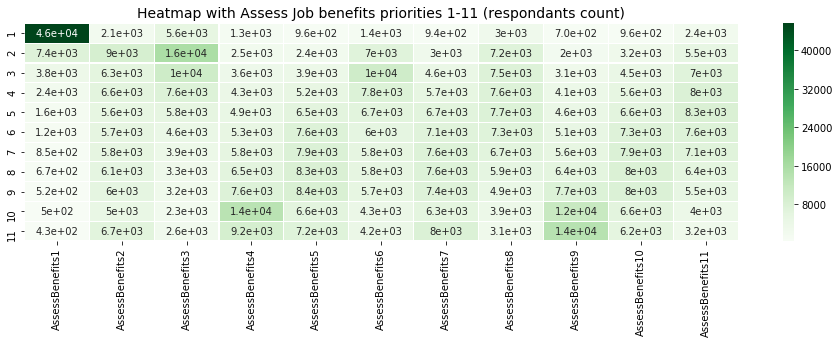

In [24]:
plot_heatmap('AssessBenefits','Heatmap with Assess Job benefits priorities 1-11 (respondants count)',"Greens")

First job benefit criteria has priority 1 given by majority of respondants. 2nd job benefit has priority 2, as well 3rd job benefit have priority 2 given by most of the respondants. Benefit 9 has priority 11 (smallest priority).


### Job contact priorities

Let's see now the answers given for the Job contact priorities group of questions. The respondents are asked to give the importance of certain criteria in the job contact (select importances from 1 to 5 for each of the 5 criteria).

In [25]:
schema_df[schema_df['Column'].str.contains('JobContactPriorities')]

,Column,QuestionText
38,JobContactPriorities1,Imagine that a company wanted to contact you a...
39,JobContactPriorities2,Imagine that a company wanted to contact you a...
40,JobContactPriorities3,Imagine that a company wanted to contact you a...
41,JobContactPriorities4,Imagine that a company wanted to contact you a...
42,JobContactPriorities5,Imagine that a company wanted to contact you a...


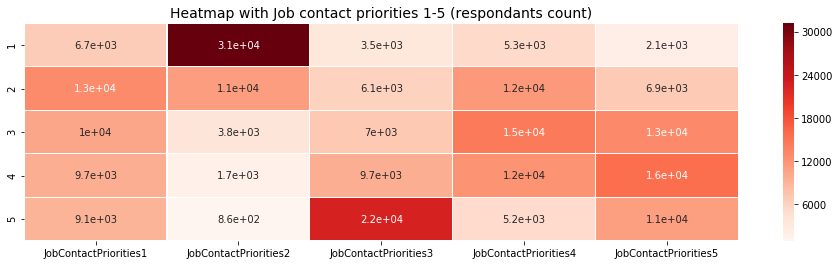

In [26]:
plot_heatmap('JobContactPriorities','Heatmap with Job contact priorities 1-5 (respondants count)',"Reds")

The 1st criteria for job contact has 2nd priority, the 2nd has 1st priority given by the majority of respondants. Criteria 3 has lowest (5) priority, 4th criteria has 4th priority as well as 5 (same 4th priority selected by majority of respondents).



### Job email priorities


Let's see now the answers given for the Job email priorities group of questions. The respondents are asked to give the importance of certain criteria in the job email (select importances from 1 to 7 for each of the 7 criteria).

In [27]:
schema_df[schema_df['Column'].str.contains('JobEmailPriorities')]

,Column,QuestionText
43,JobEmailPriorities1,Imagine that same company decided to contact y...
44,JobEmailPriorities2,Imagine that same company decided to contact y...
45,JobEmailPriorities3,Imagine that same company decided to contact y...
46,JobEmailPriorities4,Imagine that same company decided to contact y...
47,JobEmailPriorities5,Imagine that same company decided to contact y...
48,JobEmailPriorities6,Imagine that same company decided to contact y...
49,JobEmailPriorities7,Imagine that same company decided to contact y...


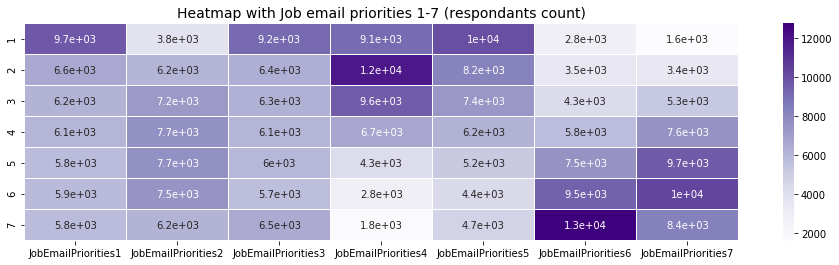

In [28]:
plot_heatmap('JobEmailPriorities','Heatmap with Job email priorities 1-7 (respondants count)',"Purples")

The majority of respondents marked as priority 1 the 1st criteria, 3rd criteria and 5 criteria. 4th criteria is ranked by majority of respondents as 2nd priority. 6th criteria is marked as lowest priority (7th) by the majority of respondants.

<a href="#0"><font size="1">Go to top</font></a>

## <a id="53">Salary</a>


Let's check the information about the salary. First, let's check the currencies for the salaries.

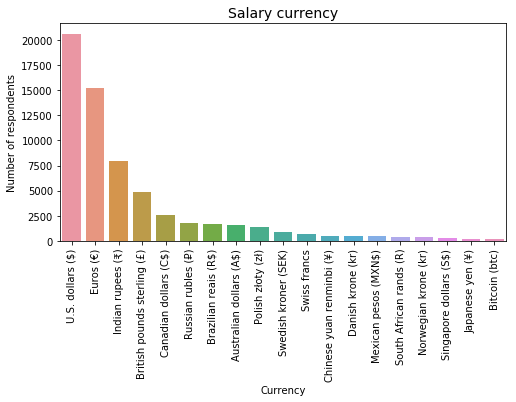

In [29]:
plot_stats('Currency','Salary currency',1)

Majority of salaries are given in U.S. dollars (over 20K). Next (~15K) are in Euros. Indian rupees are ~8K, ~5K are in GBP (British pounds).There are even few entries listing salaries in Bitcoin. 


Let's see now what are the salary types.


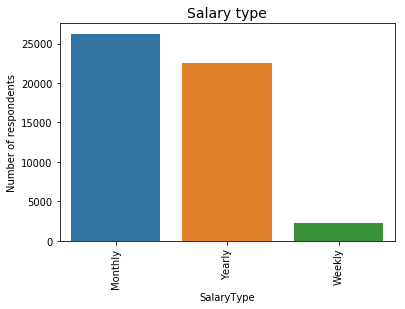

In [30]:
plot_stats('SalaryType','Salary type',0.75)

From the respondents, 25K selected Monthly salary, ~22K Yearly salary and ~2K Weekly salary.

Let's check the distribution of salaries, grouped by *Salary type*. We will use the **ConvertedSalary** (salary values are converted to U.S. dollars). We will represent both the boxplots with outliers and without outliers.

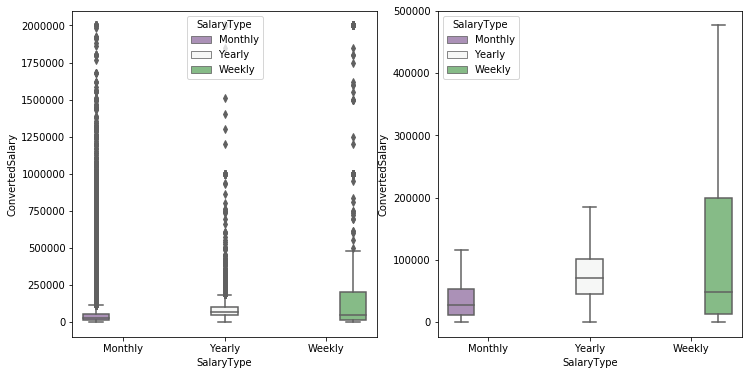

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SalaryType", y="ConvertedSalary", hue="SalaryType",data=data_df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SalaryType", y="ConvertedSalary", hue="SalaryType",data=data_df, palette="PRGn",showfliers=False)
plt.show();

Yearly salaries have an average of over 50K USD and Q4 around 200K. Monthly salaries heve the smallest average (and smallest variance) whilst the weekly salaries have the average in between the one of Yearly and Monthly salaries and the largest variance (with Q4 around 500K USD).

<a href="#0"><font size="1">Go to top</font></a>

## <a id='54'>Programming skills and preferences</a>


Let's start with what type of developer declares each respondent they are.

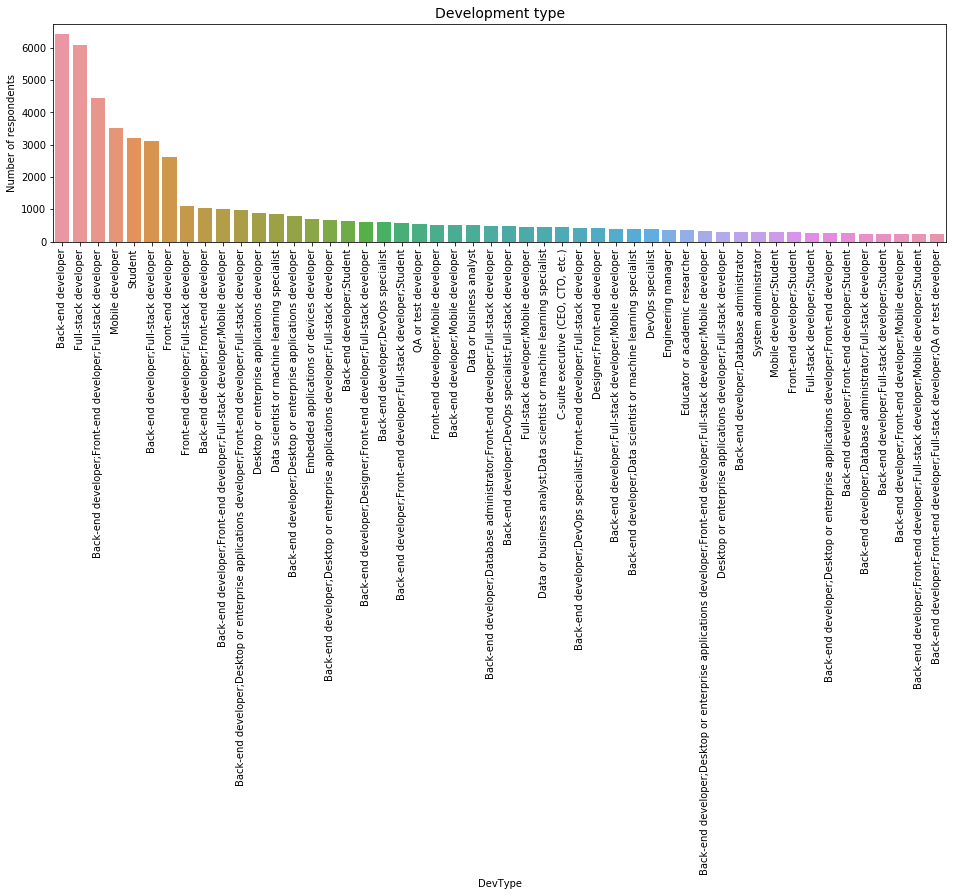

In [32]:
plot_stats('DevType','Development type',2)

Over 6K declares they are **Back-end developer**, followed with 6K **Full-stack developer**, 4.5K **Back-end developer, Front-end developer, Full-stack developer** and ~3K **Mobile developer**, followed by **Student**.

Let's see how many years of coding they have.

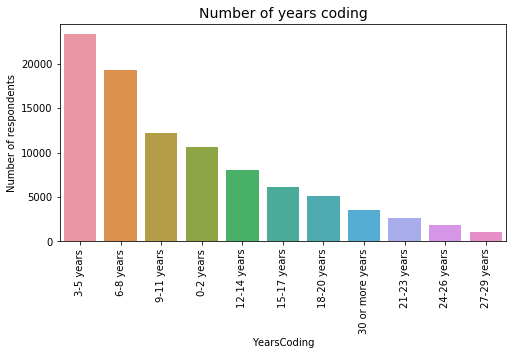

In [33]:
plot_stats('YearsCoding','Number of years coding',1)

Over 23K respondents declares that they have 3-5 years coding experience, less than 20K have 6-9 years experience and ~13K have 9-11 years experience. There are around 1K with 27-29 years experience coding.

Let's see how many years of coding profesionaly the respondents have.

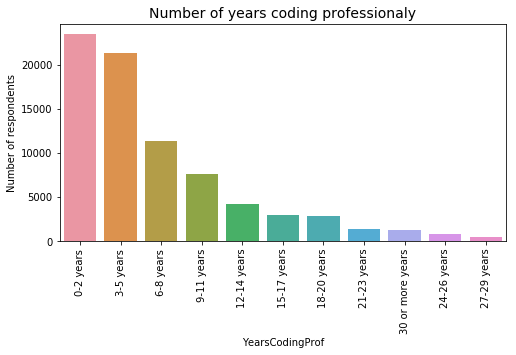

In [34]:
plot_stats('YearsCodingProf','Number of years coding professionaly',1)

Majority of respondents (~23K) selected 0-2 years of experience coding professionaly. Next, over 20K answered 3-5 years of professionaly coding, followed by ~10K with 6-8 years.

Let's see what language they worked with.

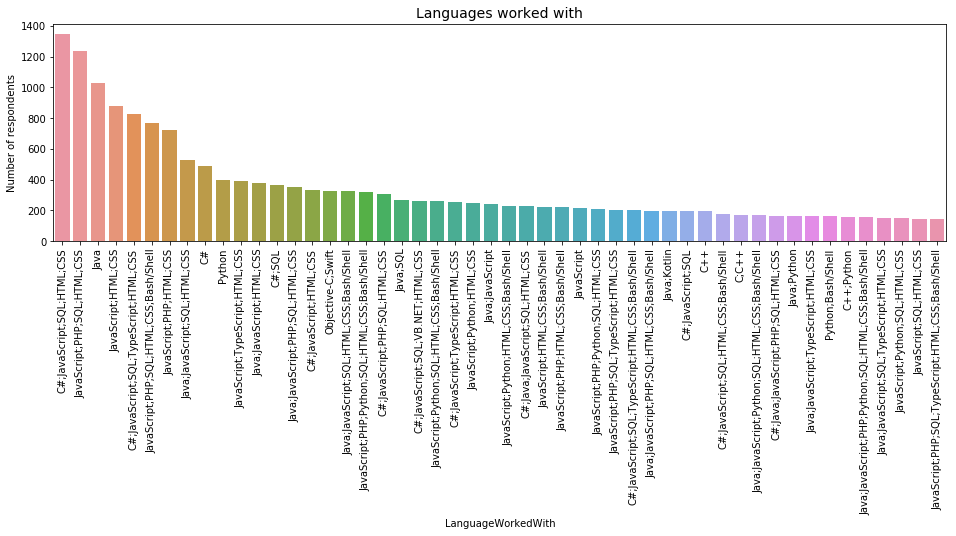

In [35]:
plot_stats('LanguageWorkedWith','Languages worked with',2)

The most frequent combination of languages is **C#;JavaScript;SQL;HTML;CSS** (indicating a full-stack web developer), with ~1350 respondents; follows **JavaScript;PHP;SQL;HTML;CSS** (same), ~1200 respondents, next is **Java** with 1K, then **JavaScript;HTML;CSS** (front-end web developer) with less than 1K. We can notice that **C++** or **C;C++** are less than 400.


Let's see what are the languages desired next year.


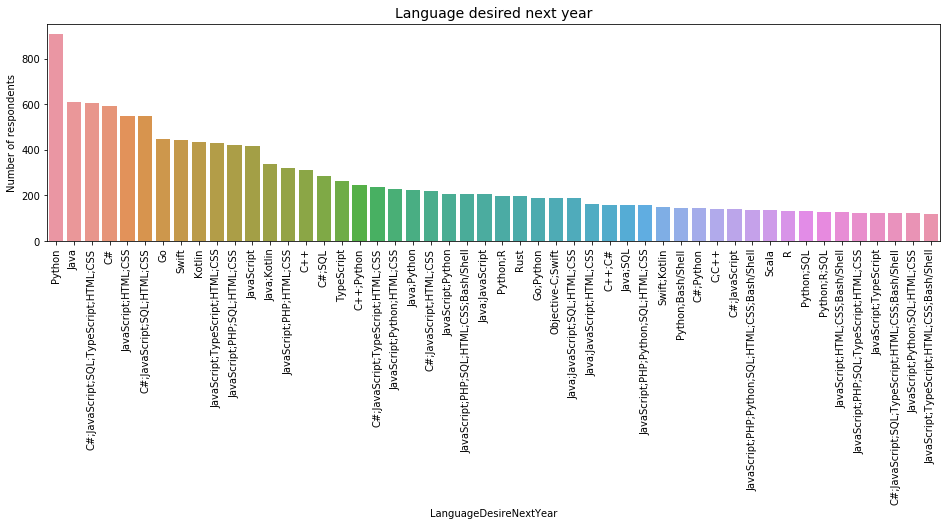

In [36]:
plot_stats('LanguageDesireNextYear','Language desired next year',2)

The options for the language to be used next year starts with **Python** (~900), followed by **Java** (600), **C#;JavaScript;SQL;TypeScript;HTML;CSS** (~600) and **C#** (~600). very popular languages like **R** or **Scala** have less than 200 options. The combination **Pythin;R** have ~200 options.


Let's see what databases the respondents are using.

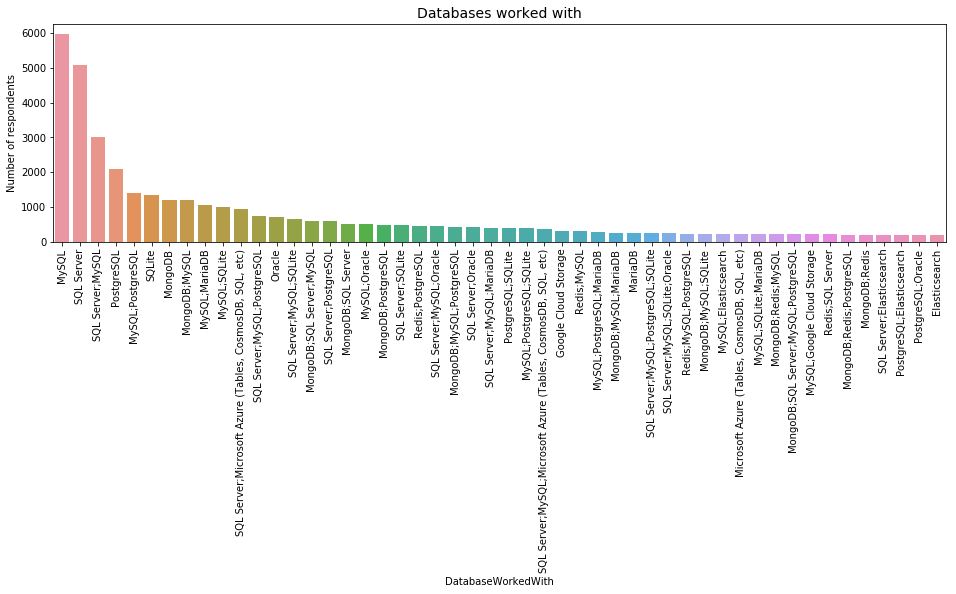

In [37]:
plot_stats('DatabaseWorkedWith','Databases worked with',2)

The most frequent combinations of databases used are  **MySQL** (6K); follows **SQL Server** (5K), then a combination of previous two: **SQL Server;MySQL** (3K) and on 4th place **PostgreSQL** (2K).


Let's see what are the databases desired for next year.

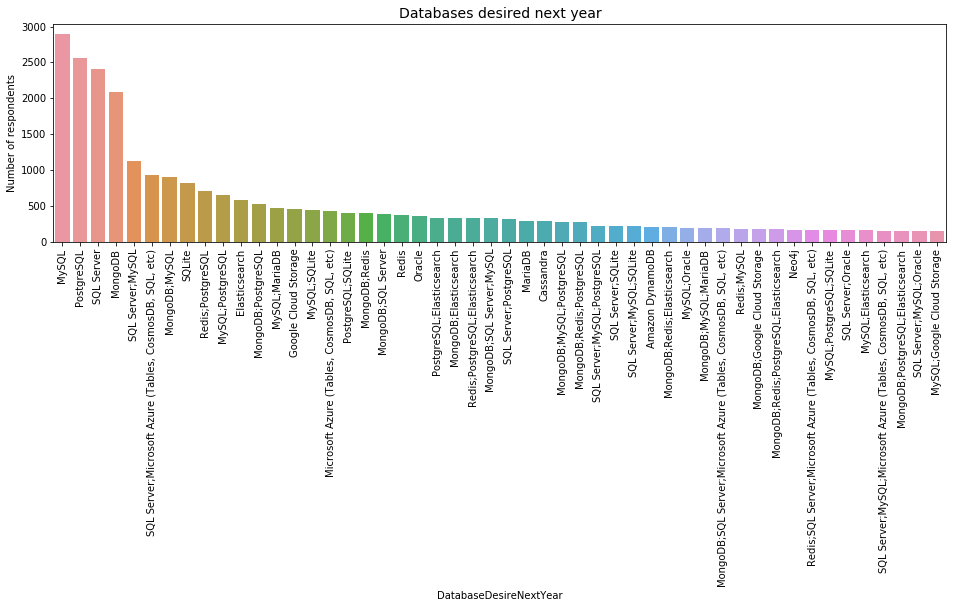

In [38]:
plot_stats('DatabaseDesireNextYear','Databases desired next year',2)

On the first four places there are **MySQL** (less than 3K respondents), **PostgreSQL** (~2.5K), **SQL Server** (less than 2.5K) and **MongoDB** (~2K respondents).

Let's see what platforms the respondents are using.

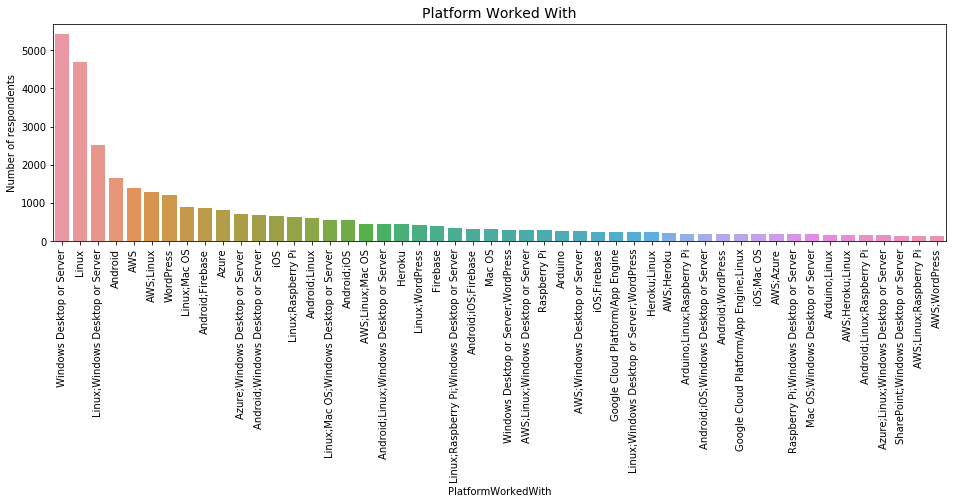

In [39]:
plot_stats('PlatformWorkedWith','Platform Worked With',2)

The respondents are using mainly **Windows Desktop or Server** (more than 5K), **Linux** (less than 5K), **Linux;Windows Desktop or Server** (~2.8K), **Android** (~1.8K), **AWS** (~1.5K).

Let's see what Platforms the respondents wants to use next year.

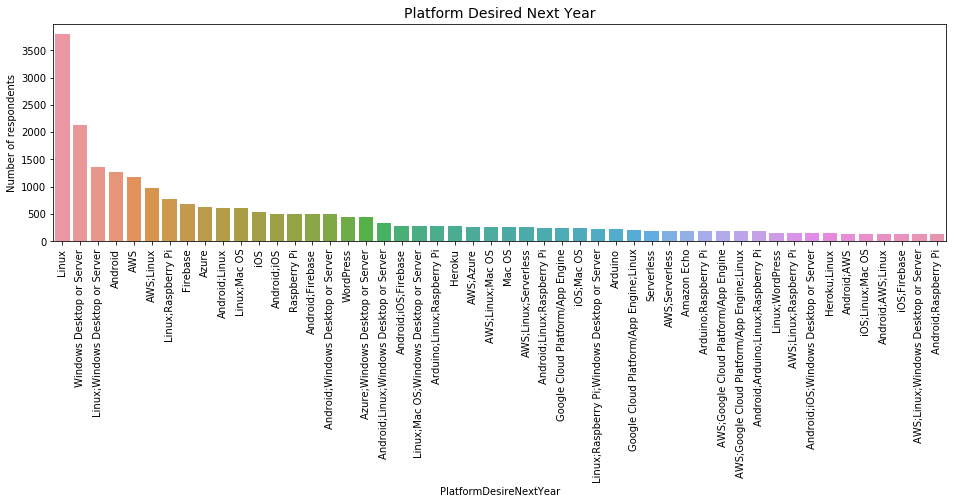

In [40]:
plot_stats('PlatformDesireNextYear','Platform Desired Next Year',2)

The respondents are intending to use next year mainly **Linux** (more than 3.5K), **Windows Desktop or Server** (more than 2K),  **Android** (less than 1.5K), **AWS** (~1.5K), **AWS;Linux** (~1K).


Let's see what operating systems the respondents are using.

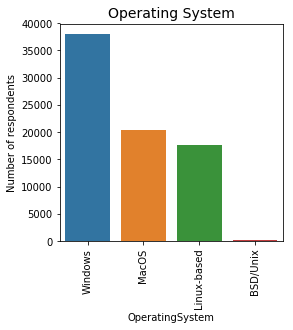

In [41]:
plot_stats('OperatingSystem','Operating System',0.5)

Most of the respondents (over 35K) are using Windows, followed by MacOS (20K) and Linux-based (less than 20K) and BSD/Unix.


<a href="#0"><font size="1">Go to top</font></a>

## <a id='55'>Advertising</a>

Let's explore some of the answers related to advertising and opinions of respondents about advertising. Lets' see what are the fields relating to `AdBlocker`.

In [42]:
schema_df[schema_df['Column'].str.contains('AdBlocker')]

,Column,QuestionText
79,AdBlocker,Do you have ad-blocking software installed on ...
80,AdBlockerDisable,"In the past month, have you disabled your ad b..."
81,AdBlockerReasons,What are the reasons that you have disabled yo...


Let's see what is the share of people with ad-blocking sowtare installed.

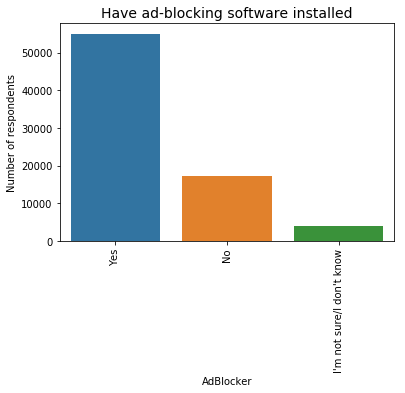

In [43]:
plot_stats('AdBlocker','Have ad-blocking software installed',0.75)

Majority of the respondants using StackOverflow are using ad-blocking software (>50K), only less than 20K are not using and less than 5K answered that they are not sure or they do not know.

Let's see what answered the respondants about if they disabled their ad-blocking software in the last month.

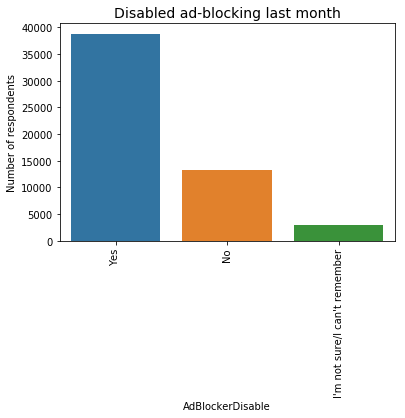

In [44]:
plot_stats('AdBlockerDisable','Disabled ad-blocking last month',0.75)

Majority of the respondants using StackOverflow disabled the ad-blocking software last month (~40K), only less than 15K were not disbled it and less than 5K answered that they are not sure or they do not know.

Let's see what answered the respondants about why they disabled their ad-blocking software in the last month.

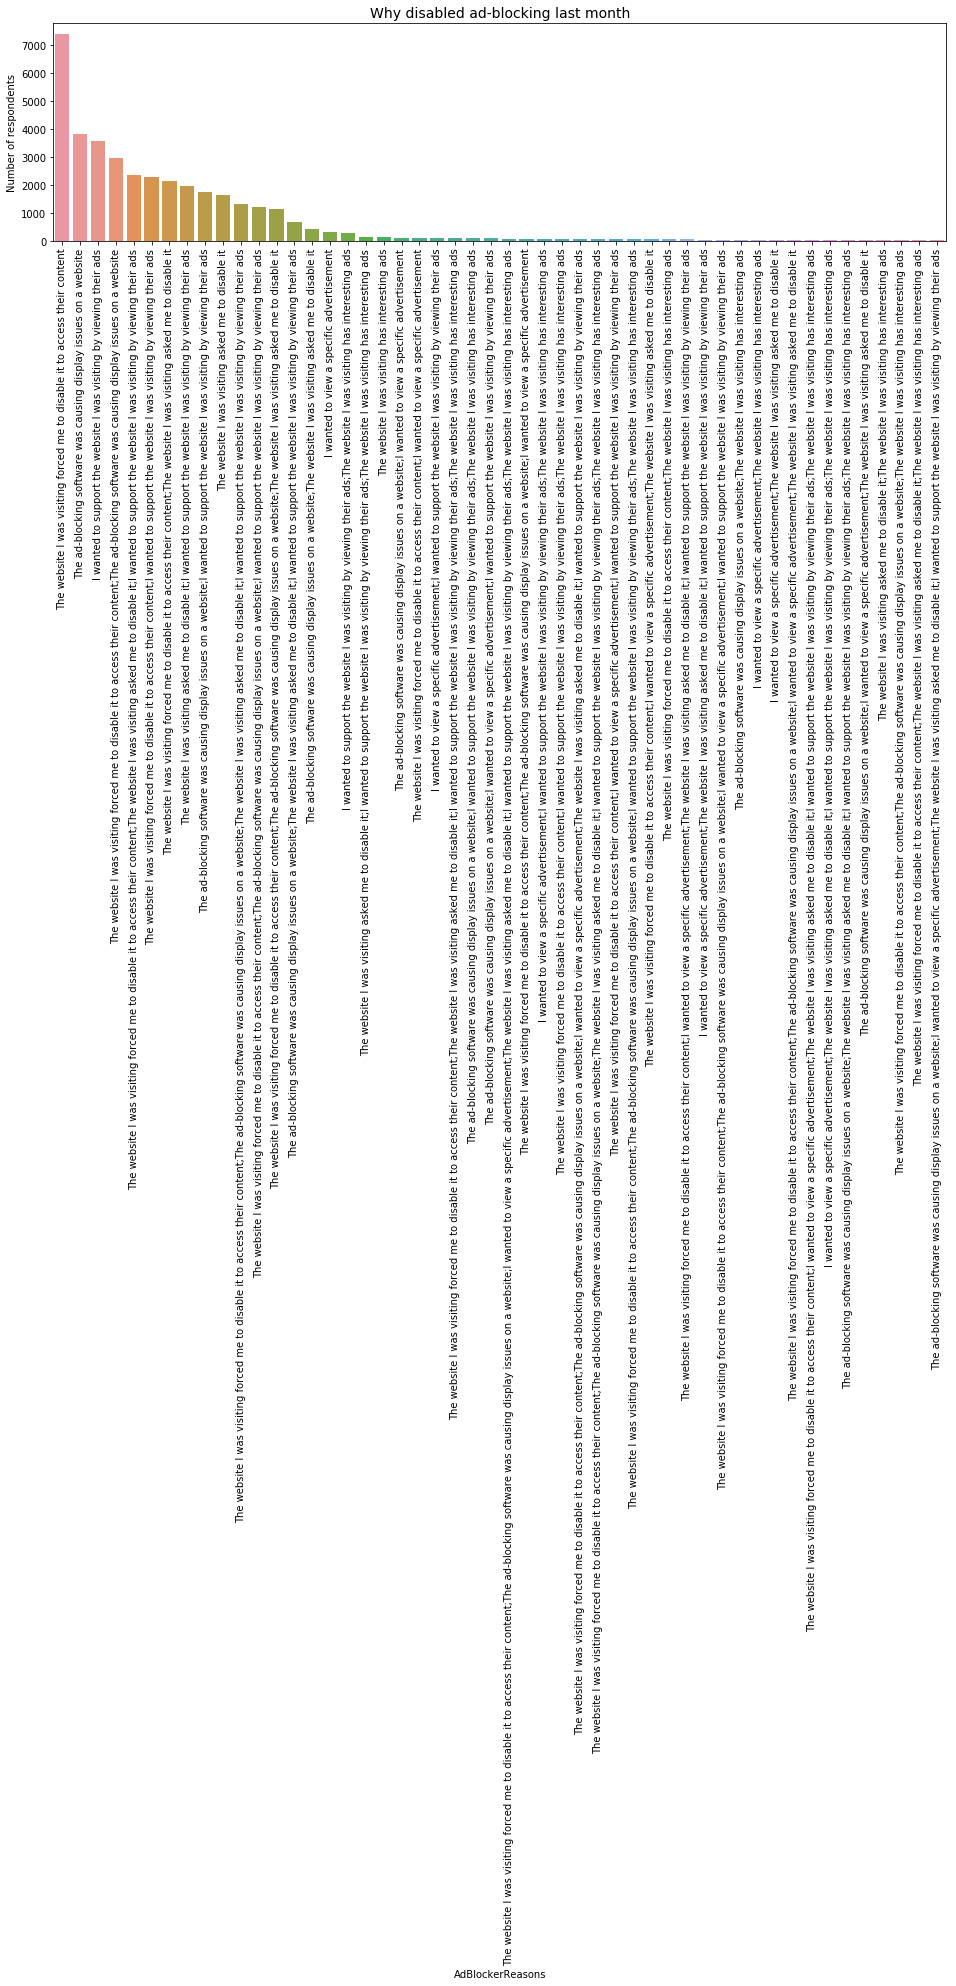

In [45]:
plot_stats('AdBlockerReasons','Why disabled ad-blocking last month',2)

### Ads Priorities

Let's see now the answers given for the Ads Priorities group of questions (**AdsPriorities1-7**). The respondents are asked what is the priority (from 1-7) for 7 different Ads related:
* (1) The advertisement is relevant to me;  
* (2) The advertisement is honest about its goals;    
* (3) The advertisement provides useful information;  
* (4) The advertisement seems trustworthy;  
* (5) The advertisement is from a company that I like;  
* (6) The advertisement offers something of value, like a free trial;  
* (7) The advertisement avoids fluffy or vague language;  



In [46]:
schema_df[schema_df['Column'].str.contains('AdsPriorities')]

,Column,QuestionText
86,AdsPriorities1,Please rank the following advertising qualitie...
87,AdsPriorities2,Please rank the following advertising qualitie...
88,AdsPriorities3,Please rank the following advertising qualitie...
89,AdsPriorities4,Please rank the following advertising qualitie...
90,AdsPriorities5,Please rank the following advertising qualitie...
91,AdsPriorities6,Please rank the following advertising qualitie...
92,AdsPriorities7,Please rank the following advertising qualitie...


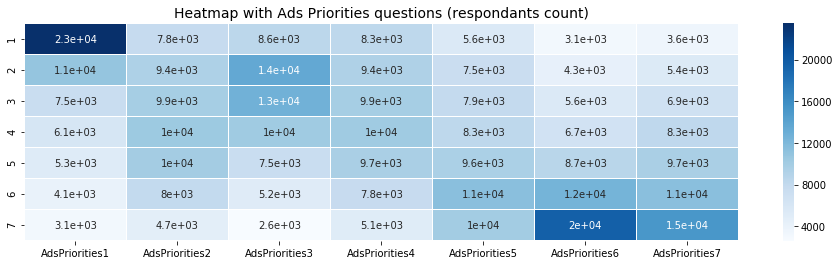

In [47]:
plot_heatmap('AdsPriorities','Heatmap with Ads Priorities questions (respondants count)',"Blues")

Majority of respondents marked that 'The advertisment is relevant to me' have the first priority. A large number of respondents marked that 'The advertisement offers something of value, like a free trial' have the least priority for them.

<a href="#0"><font size="1">Go to top</font></a>

## <a id='56'>Ethics</a>

Let's start with the Ethics Choice. The respondents are asked if they will write code for a product that they consider extremely unethical.

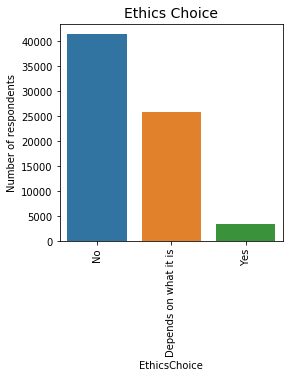

In [48]:
plot_stats('EthicsChoice','Ethics Choice',0.5)

Over 40K answered that they will not accept, over 25K answered that depends on what it is and only less than 5K answered positively.

Next question was about reporting or otherwise call out the unethical code in question.

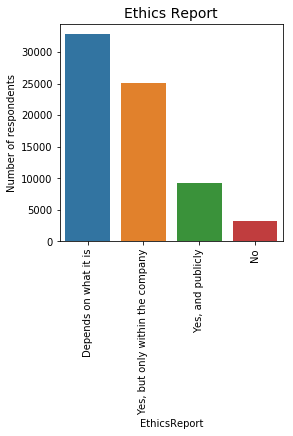

In [49]:
plot_stats('EthicsReport','Ethics Report',0.5)

Here over 30K answered that depends on what it is, ~25K answered that they will call it, but only inside the company, less than 10K declared that it will call it publicly and ~4K answered that they will not call it.

Next the respondents were asked about who they think is ultimately most responsible for code that accomplishes something unethical.

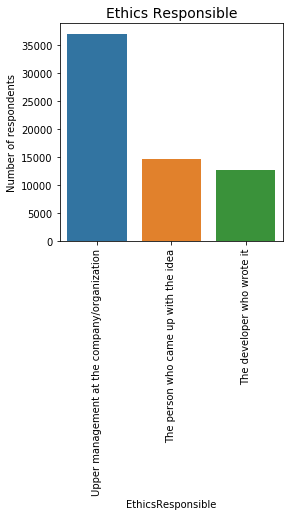

In [50]:
plot_stats('EthicsResponsible','Ethics Responsible',0.5)

Here over 35K answered that the upper management is ultimatelly responsible, ~15K answered that the person who came up with the idea is ultimatelly responsible and ~14K answered that the developer who wrote the code is the ultimate responsible.

Next the participants were asked if they believe that they have an obligation to consider the ethical implications of the code that they write.

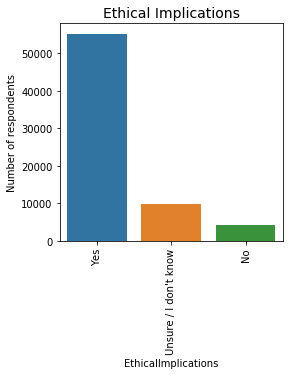

In [51]:
plot_stats('EthicalImplications','Ethical Implications',0.5)

The vast majority (over 50K) declared that they are responsible to consider the ethical implications. Less than 10K are unsure or don't know and less than 5K answered negatively.

<a href="#0"><font size="1">Go to top</font></a>

## <a id='57'>Artificial Intelligence</a>


The respondents were asked to answer to few questions related to Artificial Intelligence (AI), as following:  

* What do you think is the most dangerous aspect of increasingly advanced AI technology?  
* What do you think is the most exciting aspect of increasingly advanced AI technology?  
* Whose responsibility is it, <u>primarily</u>, to consider the ramifications of increasingly advanced AI technology?  
* Overall, what's your take on the future of artificial intelligence?

Let's start with the 1st, about the dangerous aspects of increasingly advanced AI technology.

In [52]:
schema_df[schema_df['Column'].str.contains('AI')]['QuestionText'][96]

"Overall, what's your take on the future of artificial intelligence?"

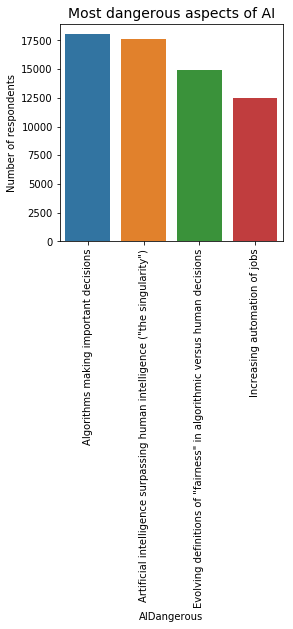

In [53]:
plot_stats('AIDangerous','Most dangerous aspects of AI',0.5)

On first two places, very close, ~17.5K respondents thinks that danger related to use of increasingly advanced AI technology are related with algorithms making important decisions and AI surpassing human intelligece (**the singularity**). Less than 15K thinks that the evolving definitions of `fairness` in algorithmic vs. human decissions are most relevant whilst less than 12.5K were concerned with increasing automation of jobs, which they see as the main danger.

About the most exciting aspects of AI, there were the following answers:

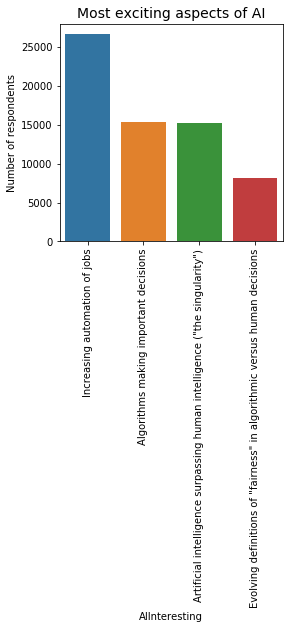

In [54]:
plot_stats('AIInteresting','Most exciting aspects of AI',0.5)

On first place more than 25K respondents place increasing automation of jobs, on the second and third place, very close, are, with 15K, algorithms making important decisions and AI surpassing human intelligece (**the singularity**). Less than 10 thinks that the evolving definitions of `fairness` in algorithmic vs. human decissions ist most exciting.

About the most responsibility for AI, there were the following answers:

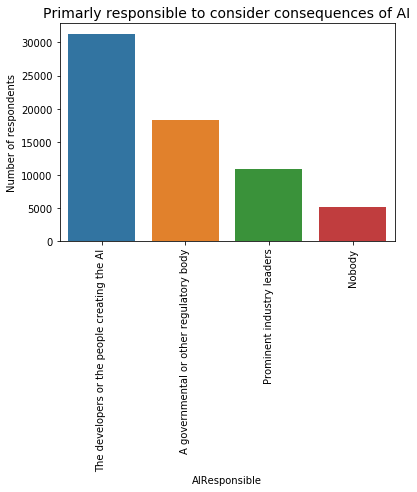

In [55]:
plot_stats('AIResponsible','Primarly responsible to consider consequences of AI',0.75) 

More than 30K think that the developers or the people creating the AI are primarly responsible, less than 20K thinks that a governamental or other regulatory body should be the primarly responsible, ~12K consider that the primarly responsible are the proeminent industry leaders and ~5K thinks that the answer is `nobody`.

As for the future of AI, here are the answers:

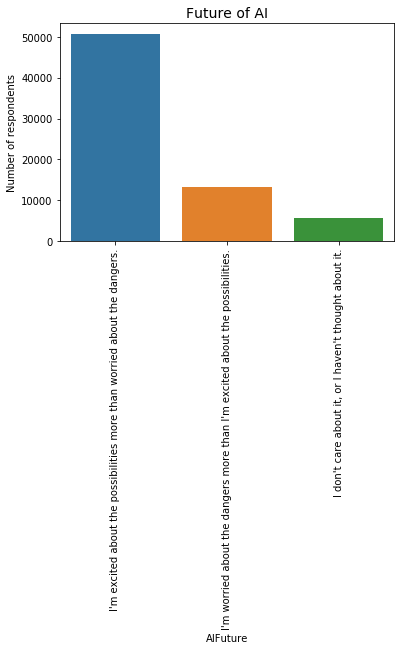

In [56]:
plot_stats('AIFuture','Future of AI',0.75) 

Most of the respondents are excited by the future of AI (50K), ~12K are worried, considering the dangers larger than the benefits, whilst ~5K don't care or didn't thought about it.

<a href="#0"><font size="1">Go to top</font></a>

## <a id='58'>Personal information</a>

Let's explore some of the personal information about the respondents. Let's start with their age.

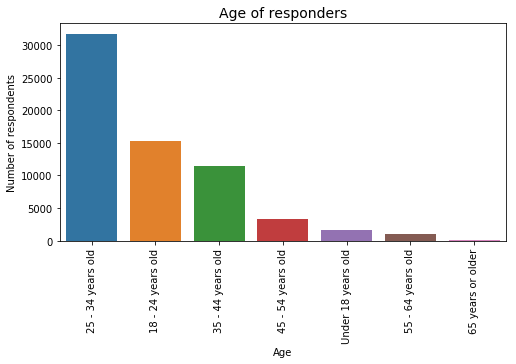

In [57]:
plot_stats('Age','Age of responders',1)

Majority of responders are between 25-34 years old (~30K). Around 15K are between 18-24 years, ~10K are 35-44 years old.

Let's see what is the gender and the sexual preference of the respondents.

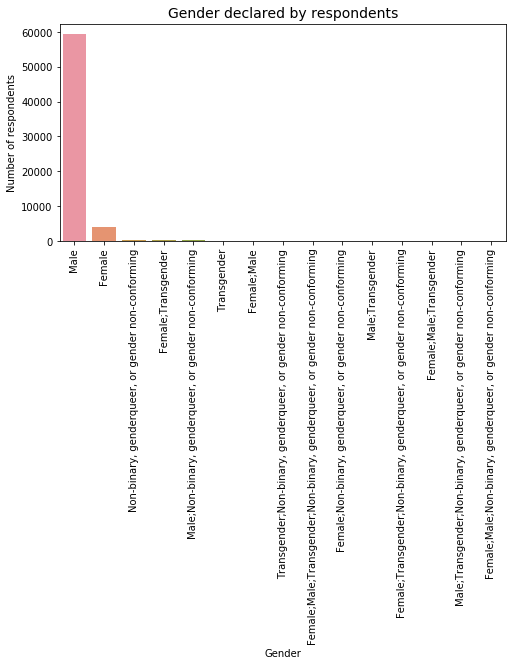

In [58]:
plot_stats('Gender','Gender declared by respondents',1)

Majority of the respondents are **Male** (~60K), followed by **Female** (~5K) and a small number of **Non-binary, genderqueer, or gender non-conforming** and **Female;Transgender**.

Let's check the Sexual orientation.

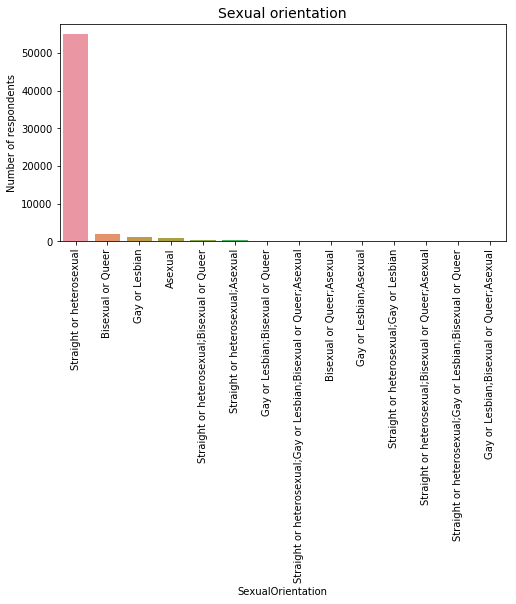

In [59]:
plot_stats('SexualOrientation','Sexual orientation',1)

Majority of respondents declares themselfs as **Straight or heterosexual** (~45K), followed by a small number of **Bisexual or Queer** and **Gay or Lesbian** and **Asexual**.

Let's check the respondents Race and Ethnicity.

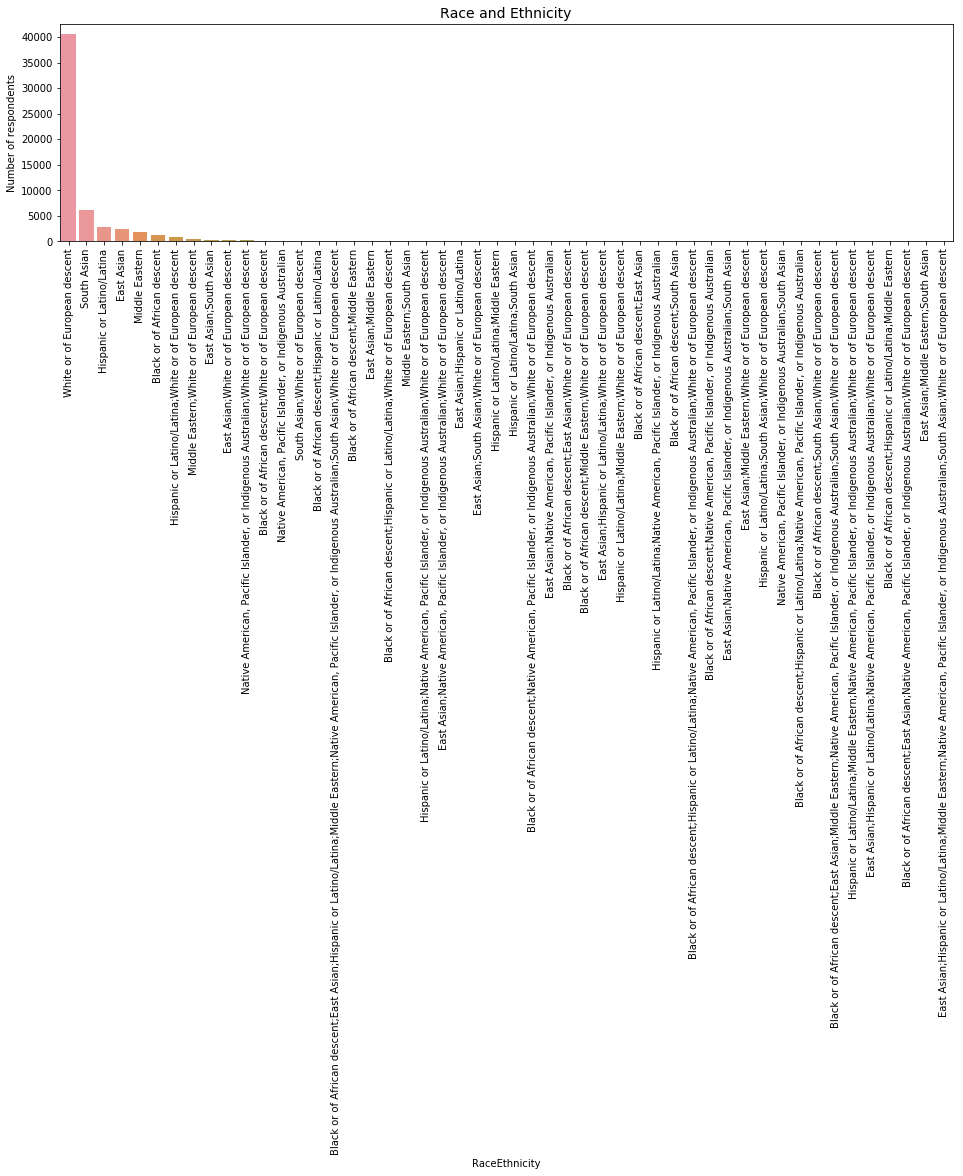

In [60]:
plot_stats('RaceEthnicity','Race and Ethnicity',2)

Most of the respondents identifies themselfs as **White or of European descent** (40K) followed by **South Asian** (~6K) and **Hispanic or Latino/Latina** (~3K).

Let's see how much they exercise and how many hours they spend outside.

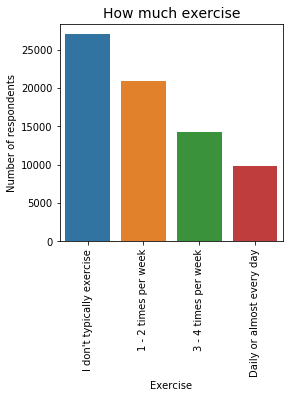

In [61]:
plot_stats('Exercise','How much exercise',0.5)

Most of the respondents claimed that they don;t typically exercise (more than 25K), followed by ~20K that exercise 1-2 times per week, ~15K that are exercising 3-4 times/week and ~10K that are exercising daily or almost every day.



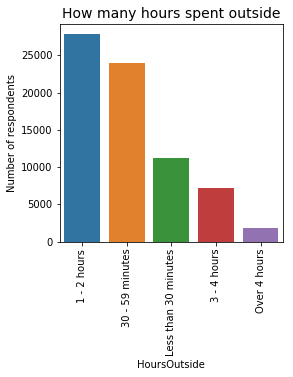

In [62]:
plot_stats('HoursOutside','How many hours spent outside',0.5)

Most of the respondents (more than 25K) are spending 1-2 hours per day outside, less than 25K are spending 30-59 minutes outside, and more than 10K are spending less than 30 minutes outside. Around 2K are spending over 4 hours outside every day.

<a href="#0"><font size="1">Go to top</font></a>

# <a id="6">Advanced data analysis</a>  

##  <a id="61">Salary per employment type and gender</a>

Let's look to the salary for both employment type and gender. We will create heatmaps to visualize on a single graph.

In [63]:
def plot_heatmap_mean(feature1, feature2, feature3, color, title):
    tmp = data_df.groupby([feature1, feature2])[feature3].mean()
    df1 = tmp.reset_index()
    matrix = df1.pivot(feature1, feature2, feature3)
    fig, (ax1) = plt.subplots(ncols=1, figsize=(16,6))
    sns.heatmap(matrix, 
        xticklabels=matrix.columns,
        yticklabels=matrix.index,ax=ax1,linewidths=.1,annot=True,cmap=color)
    plt.title(title, fontsize=14)
    plt.show()



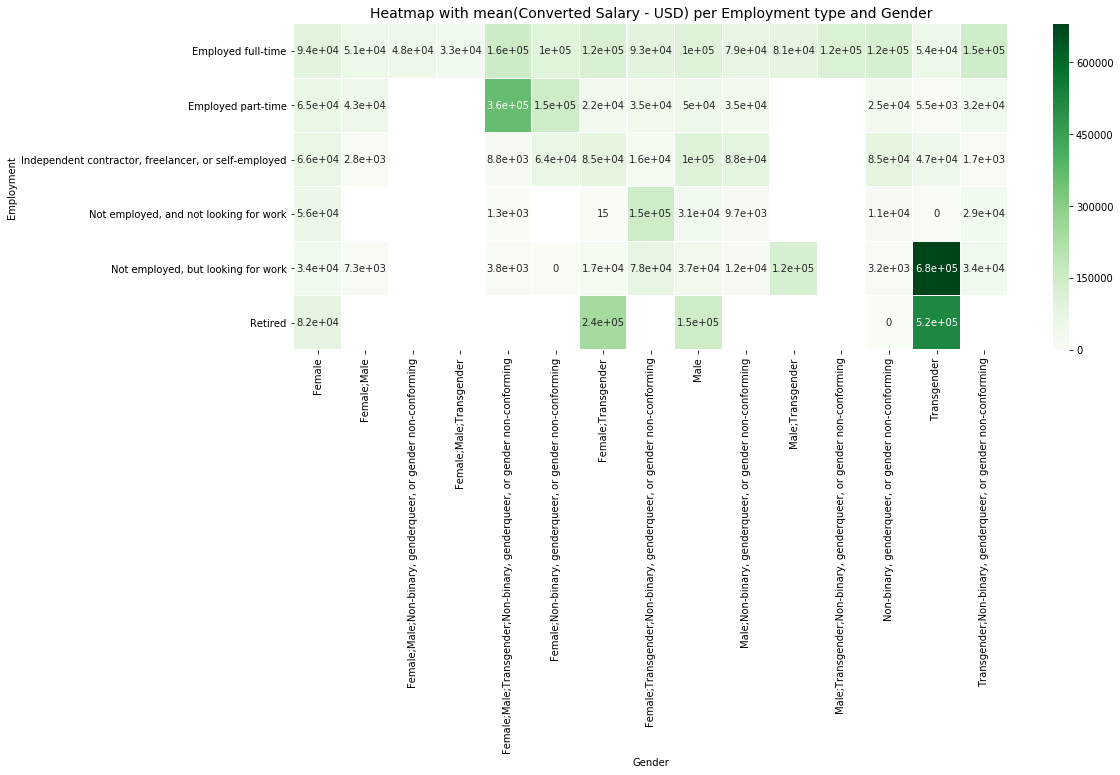

In [64]:
plot_heatmap_mean('Employment', 'Gender','ConvertedSalary', "Greens", "Heatmap with mean(Converted Salary - USD) per Employment type and Gender")

We can observe that, while the average salary for male full-time is larger than female full-time (with 6.3%), the average part-time salary for females is larger than for men (with 30%). 

For Independent contractor, freelancer or self-employed, the difference in average income between male and female is even higher than for full-time and part-time (34%).

As for retired, male average income is much higher than female average income (with 45%).

The very high values for {Retired;Female,Transgender}, {Retired;Transgender}, {Not employed, but looking for work;Transgender} look like outliers actually; let's check how many entries are actually in these categories.

Let's see what are the number of participants in the survey of these categories {Gender;Employement}.

In [65]:
def plot_heatmap_count(feature1, feature2, color, title):
    tmp = data_df.groupby([feature1, feature2])['Country'].count()
    df1 = tmp.reset_index()
    matrix = df1.pivot(feature1, feature2, 'Country')
    fig, (ax1) = plt.subplots(ncols=1, figsize=(16,6))
    sns.heatmap(matrix, 
        xticklabels=matrix.columns,
        yticklabels=matrix.index,ax=ax1,linewidths=.1,annot=True,cmap=color)
    plt.title(title, fontsize=14)
    plt.show()

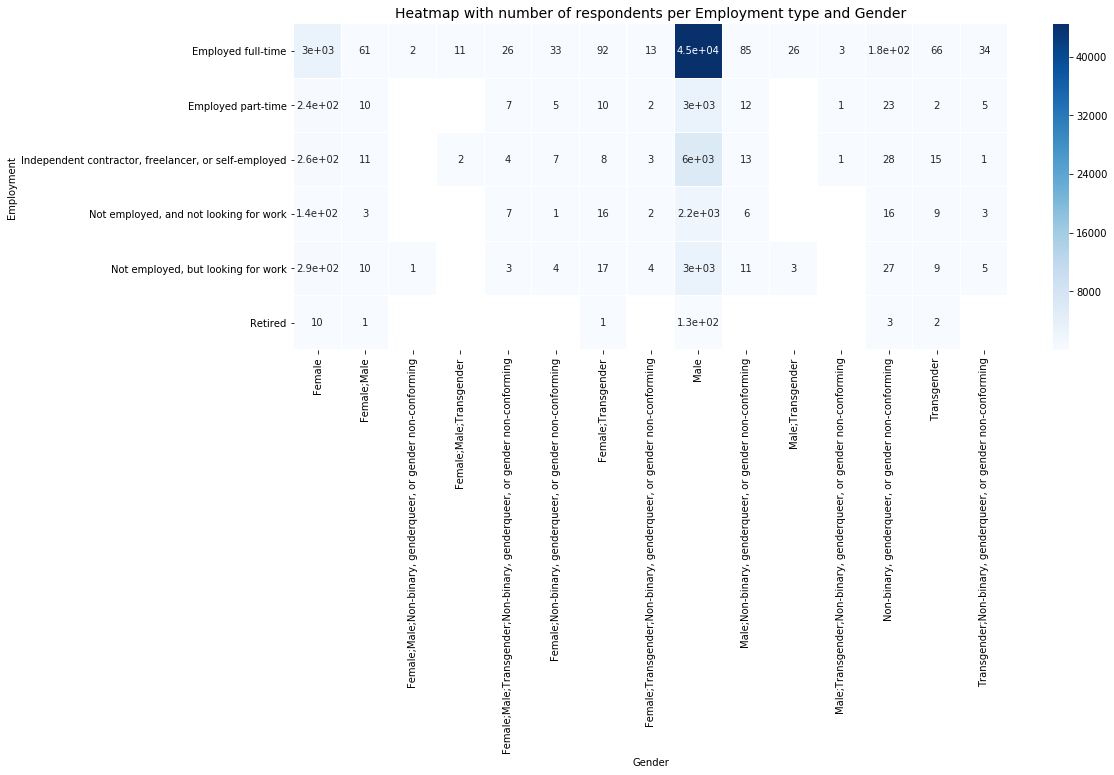

In [66]:
plot_heatmap_count('Employment', 'Gender',"Blues", "Heatmap with number of respondents per Employment type and Gender")

Indeed, the cases with very high incomes {Retired;Female,Transgender}, {Retired;Transgender}, {Not employed, but looking for work;Transgender} are quite isolate, since their counts are 2,1, and 9.

##  <a id="62">Salary per employment type and years coding</a>


Let's analyze now the salary per employment type and years coding.

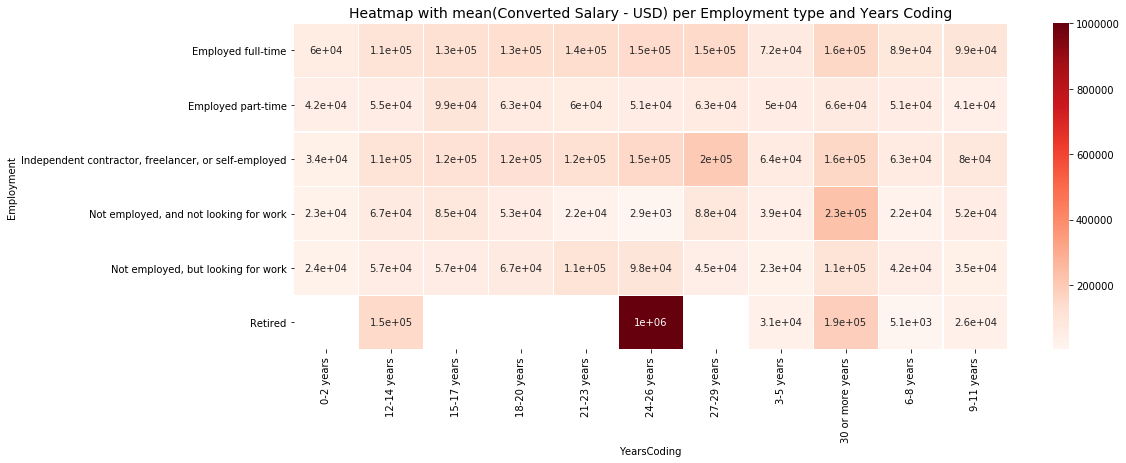

In [67]:
plot_heatmap_mean('Employment', 'YearsCoding','ConvertedSalary', "Reds", "Heatmap with mean(Converted Salary - USD) per Employment type and Years Coding")

For employees full-time, the average salary increases with the number of experience. 

For part-time employees, there is a peak at 15-17 years and then the salary is decreasing to raise again for 27-29 years. Overall, the values are much smaller than for full-time. 

For independent contractor, free-lancer or self-employed, overall, the average salaries are higher than for full-time employees and are also increasing with the years of coding and only decreasing for 30 or more years.

## <a id="63">Operating system and gender</a>

Let's see now what is the relationship between operating system preference and gender.

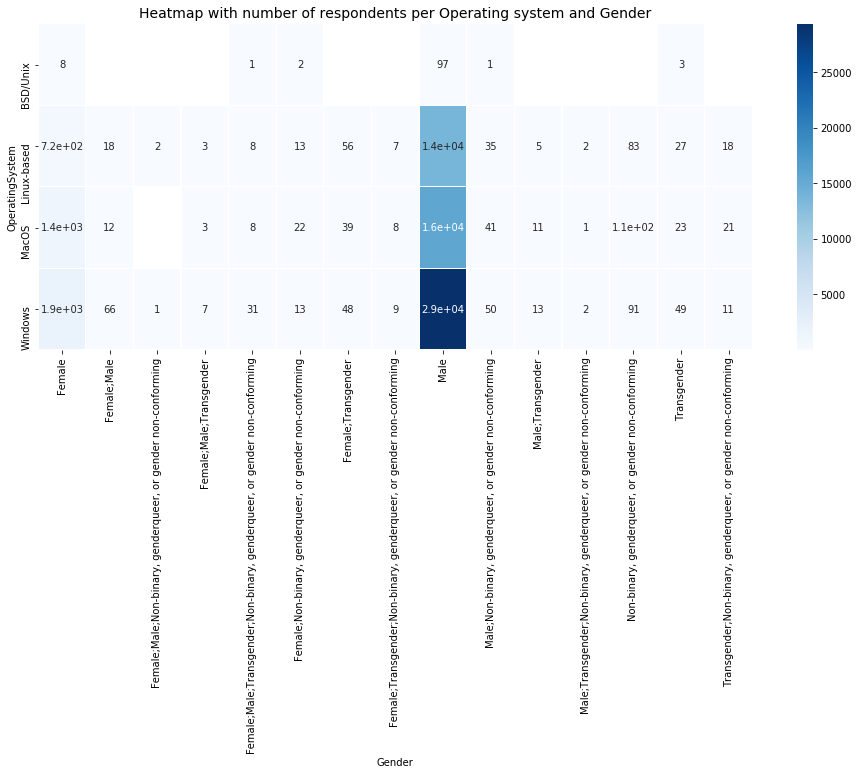

In [68]:
plot_heatmap_count('OperatingSystem', 'Gender',"Blues", "Heatmap with number of respondents per Operating system and Gender")

A larger percent of female are using MacOS vs. Windows than in the case of males. The greatest unbalance is in the case of BSD/Unix, where the number of males is more than 10 times than of females.

Non-binary, genderqueer, or gender non-conforming using MacOS is larger than for Windows.

## <a id="64">Exercise and Operating System</a>

Let's explore the relationship between the Operating System option and Exercise (how many respondents for each combination of options of these two dimmensions).

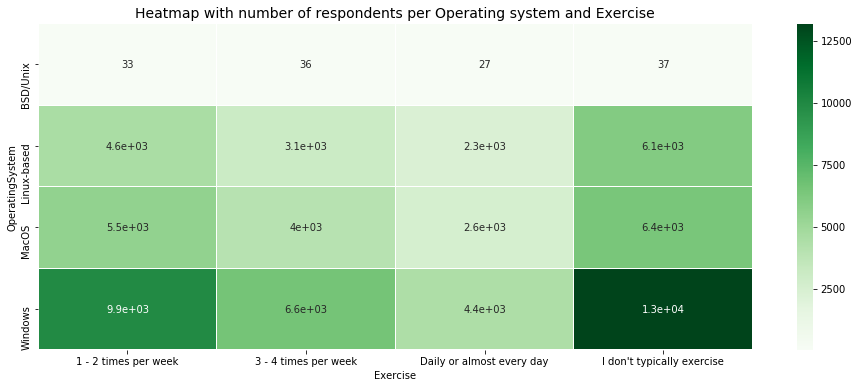

In [69]:
plot_heatmap_count('OperatingSystem', 'Exercise',"Greens", "Heatmap with number of respondents per Operating system and Exercise")

The number of MacOS users doing exercise daily or almost every day is 40% from the number of MacOS users that don't typically exercise.


the number of Linux users doing exercise daily or almost every day is 37% from the number of Linux users that don't typically exercise. 

In the same time the number of Windows users doing exercise daily or almost every day is 33% from the number of Windows users that don't typically exercise. 

## <a id="65">Dangers of AI and age</a>

Let's see what is the relationship between age of respondents and how they perceive the dangers of AI.

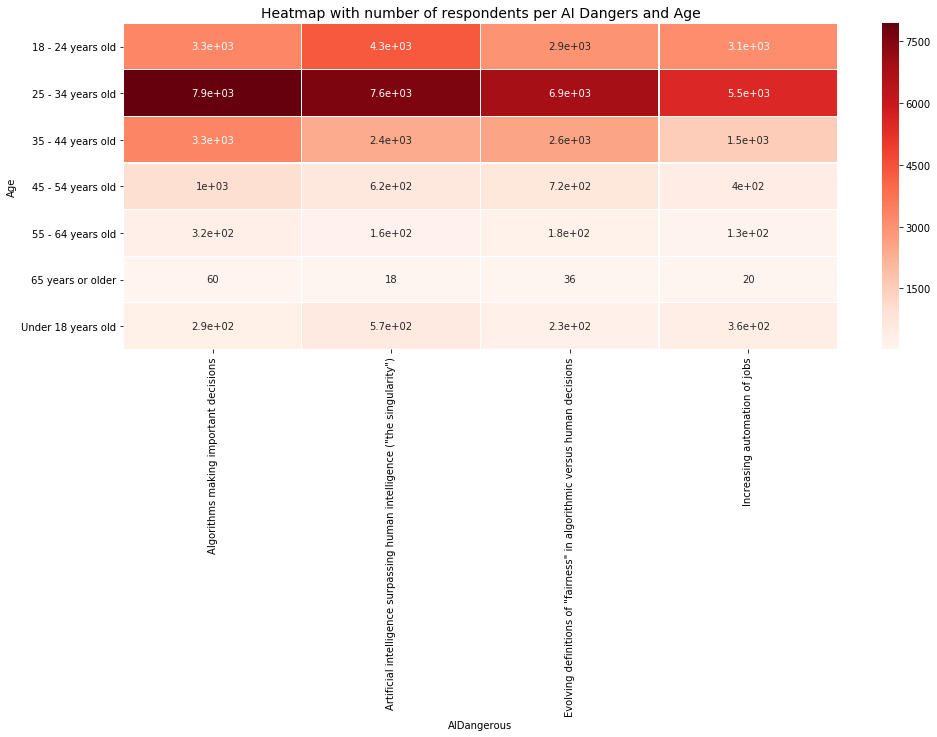

In [70]:
plot_heatmap_count('Age', 'AIDangerous',"Reds", "Heatmap with number of respondents per AI Dangers and Age")

For the **under-18** and **18-24 years old** respondents, the worst danger is relating to artificial intelligence surpassing human intelligence ("the singularity").

For the rest of age intervals, the worst danger is related to algorithms making important decisions.

## <a id="66">Dangers of AI and Operating System</a>


Let's see what is the relationship between Operating System preferences of respondents and how they perceive the dangers of AI.

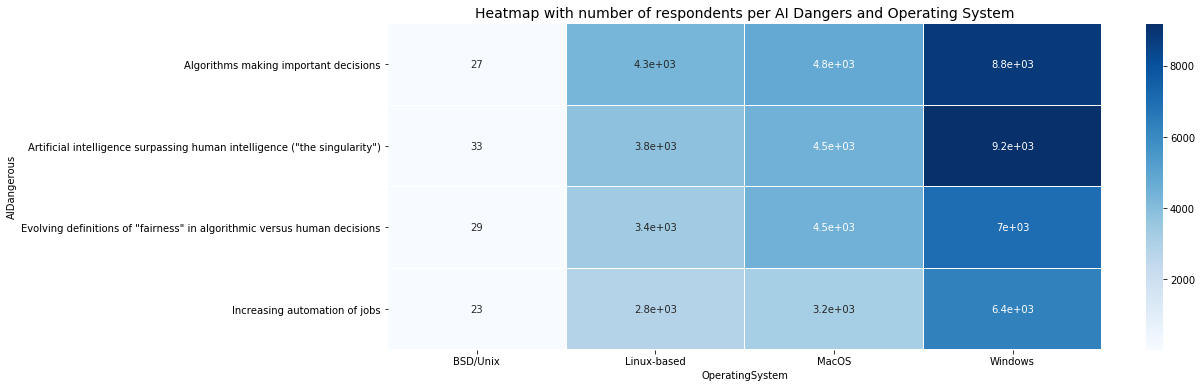

In [71]:
plot_heatmap_count('AIDangerous', 'OperatingSystem', "Blues", "Heatmap with number of respondents per AI Dangers and Operating System")

The users of Linux-based and MacOS consider that **Algorithms making important decisions** is the most important AI danger, followed by **Artificial intelligence surpassing human intelligence (the `singularity`)**, **Evolving definition of `fairness` in algorithmic versus human decisions** and **Increasing automation of jobs**.  
The users of BSD/Unix and Windows consider that **Artificial intelligence surpassing human intelligence (the `singularity`)** is the most important AI Danger. Windows users put **Algorithms making important decisions** on second place, whilst BSD/Linux  put **Evolving definition of `fairness` in algorithmic versus human decisions** on second place. 

## <a id="67">Most exciting  aspects of AI and age</a>


Let's see what is the relationship between age of respondents and how they perceive the most exciting aspects of AI.

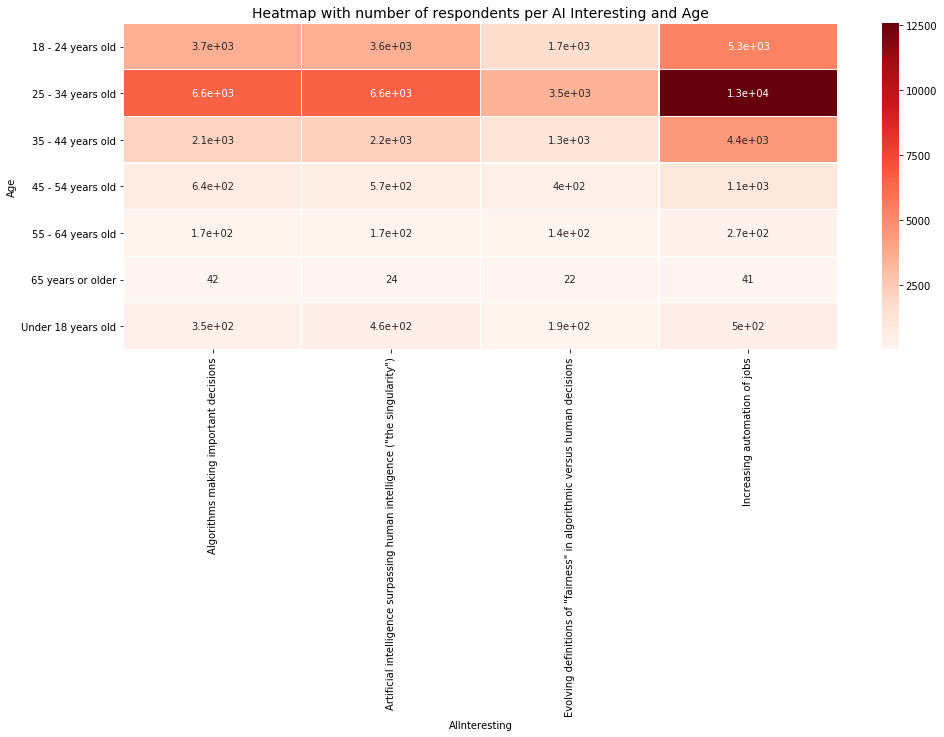

In [72]:
plot_heatmap_count('Age', 'AIInteresting', "Reds", "Heatmap with number of respondents per AI Interesting and Age")

## <a id="68">Most exciting  aspects of AI and Operating System</a>


Let's see what is the relationship between choice of Operating System of respondents and how they perceive the most exciting aspects of AI.

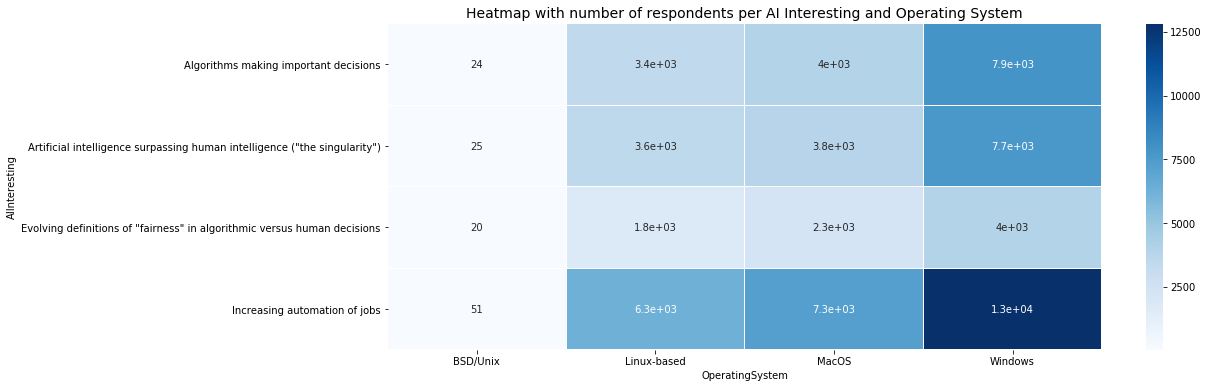

In [73]:
plot_heatmap_count('AIInteresting','OperatingSystem',  "Blues", "Heatmap with number of respondents per AI Interesting and Operating System")

## <a id="69">Responsibility for AI and age</a>


Let's see what is the relationship between age of respondents and how they perceive the responsibility for AI.



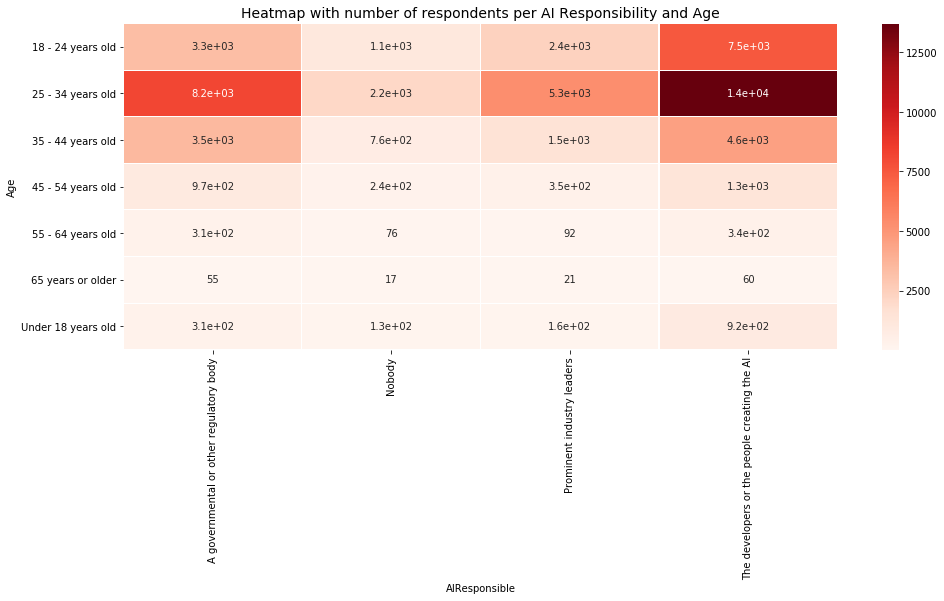

In [77]:
plot_heatmap_count('Age', 'AIResponsible', "Reds", "Heatmap with number of respondents per AI Responsibility and Age")

All ages ranges reckon that **The developers or the people creating the AI** are primarly responsible of for AI. The younger part of the community (contributors with 1-24, 25-34, 35-44 year groups) put on the second place **A governamental or other regulated body** whilst older age groups put on 2nd place **Proeminent industry leaders**.


## <a id="610">Responsibility for AI and Operating System</a>


Let's see what is the relationship between age of respondents and how they perceive the the responsibility for AI.




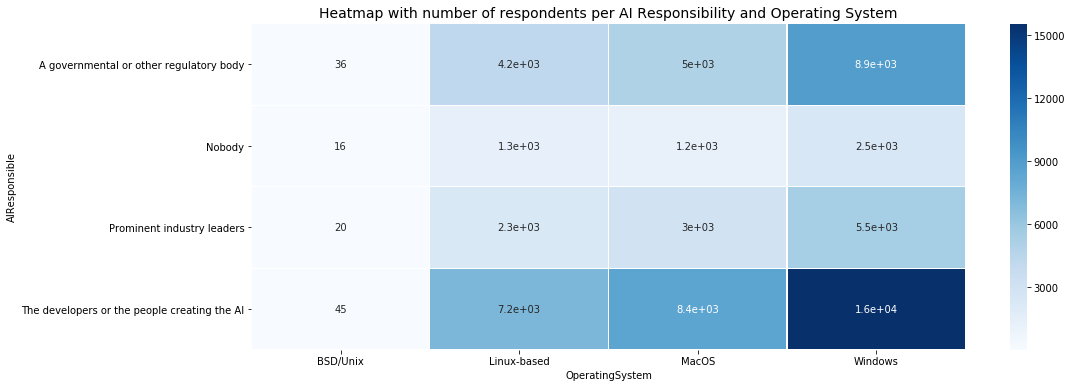

In [75]:
plot_heatmap_count('AIResponsible','OperatingSystem',  "Blues", "Heatmap with number of respondents per AI Responsibility and Operating System")

<a href="#0"><font size="1">Go to top</font></a>  



# <a id="7">Feedback</a>  

This Kernel is still under development. I would very much appreciate your feedback.


<a href="#0"><font size="1">Go to top</font></a>

# <a id="8">References</a>  

[1] StackOverflow, https://stackoverflow.com/  
[2] StackOverflow 2018 Developer Survey results dataset, https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey  



<a href="#0"><font size="1">Go to top</font></a>